In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# DB imports
import sqlite3
from pathlib import Path

In [9]:
conn = sqlite3.connect('cars_sold.sqlite')

In [10]:
query = 'SELECT * FROM cars_sold'
cars_sold_df = pd.read_sql_query(query, conn)

In [11]:
conn.close()

In [12]:
cars_sold_df.head()

,make,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [14]:
# Assuming 'price' is the target variable and other columns are features
X = cars_sold_df.drop('price', axis=1)  # Features
y = cars_sold_df['price']  # Target variable

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RANSACRegressor model
model = RANSACRegressor(max_trials=100)

# Fit the model
model.fit(X_train, y_train)


RANSACRegressor()

In [15]:
# Initialize the RANSACRegressor model
model = RANSACRegressor()

# Fit the RANSACRegressor model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Test set evaluation:\n_____________________________________________')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")




Test set evaluation:
_____________________________________________
Mean Absolute Error (MAE): 2410.5536047710775
Mean Squared Error (MSE): 23395550.5762491
Root Mean Squared Error (RMSE): 4836.894724536508
R-squared (R2): 0.7548385120218916


## Test set evaluation
Mean Absolute Error (MAE):
MAE of 2494.72 indicates, on average, your model's predictions are off by approximately 2494.72 units.
Mean Squared Error (MSE):
An MSE of 26228238.33 means that, on average, the squared differences between predicted and actual values are 26228238.33.
Root Mean Squared Error (RMSE):
An RMSE of 5121.35 indicates that, on average, our model's predictions are off by approximately 5121.35 units.
R-squared (R2):
An R-squared value of 0.7252 means that your model explains approximately 74.89% of the variance in the target variable.

Size of X_test: 20
Size of y_test: 20


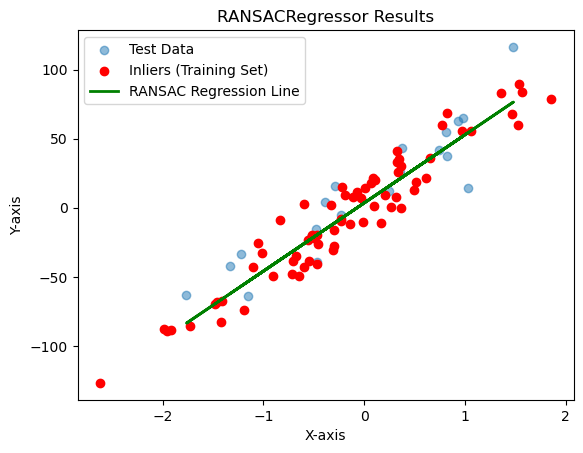

In [1]:



import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate some example data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RANSACRegressor model
model = RANSACRegressor()

# Fit the RANSACRegressor model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Check the sizes of X_test and y_test
print("Size of X_test:", len(X_test))
print("Size of y_test:", len(y_test))

# Visualize the results
inliers_X = X_train[model.inlier_mask_]
inliers_y = y_train[model.inlier_mask_]

# Visualize the results
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)
plt.scatter(inliers_X, inliers_y, color='red', marker='o', label='Inliers (Training Set)')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='RANSAC Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('RANSACRegressor Results')
plt.legend()
plt.show()
